In [ ]:
import json

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical


In [8]:
# Global variables
BATCH_SIZE = 128
EPOCHS = 100

In [9]:
# Get the class weights from a JSON file
with open('class_weights.json', "r") as f:
    class_weight_dict = json.load(f)

In [10]:
# Preprocessed data
X_train = np.load('preprocessed_data/X_train.npy')
y_train = np.load('preprocessed_data/y_train.npy')
X_test = np.load('preprocessed_data/X_test.npy')
y_test = np.load('preprocessed_data/y_test.npy')

In [11]:
# Transform the y_train and y_test labels to categorical
y_train_cat = to_categorical(y_train, num_classes=len(np.unique(y_train)))
y_test_cat = to_categorical(y_test, num_classes=len(np.unique(y_train)))

In [ ]:
# Model definition
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(60, X_train.shape[2])))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(LSTM(64)) 
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(len(np.unique(y_train)), activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [15]:
# Train the model
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_test, y_test_cat),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    class_weight=class_weight_dict,
    callbacks=[early_stop]
)

Epoch 1/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 35s 122ms/step - accuracy: 0.5191 - loss: 1.2258 - val_accuracy: 0.6370 - val_loss: 0.9022
Epoch 2/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 34s 124ms/step - accuracy: 0.6807 - loss: 0.7827 - val_accuracy: 0.7123 - val_loss: 0.6579
Epoch 3/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 35s 129ms/step - accuracy: 0.7295 - loss: 0.6565 - val_accuracy: 0.7520 - val_loss: 0.5944
Epoch 4/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 34s 124ms/step - accuracy: 0.7466 - loss: 0.6092 - val_accuracy: 0.7617 - val_loss: 0.5737
Epoch 5/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 37s 134ms/step - accuracy: 0.7697 - loss: 0.5634 - val_accuracy: 0.8246 - val_loss: 0.4669
Epoch 6/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 37s 134ms/step - accuracy: 0.7894 - loss: 0.5043 - val_accuracy: 0.8249 - val_loss: 0.4224
Epoch 7/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 37s 135ms/step - accuracy: 0.8073 - loss: 0.4729 - val_accuracy: 0.8290 - val_loss: 0.4243
Epoch 8/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 38s 140ms/step - accuracy: 0.8189 -

274/274 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step


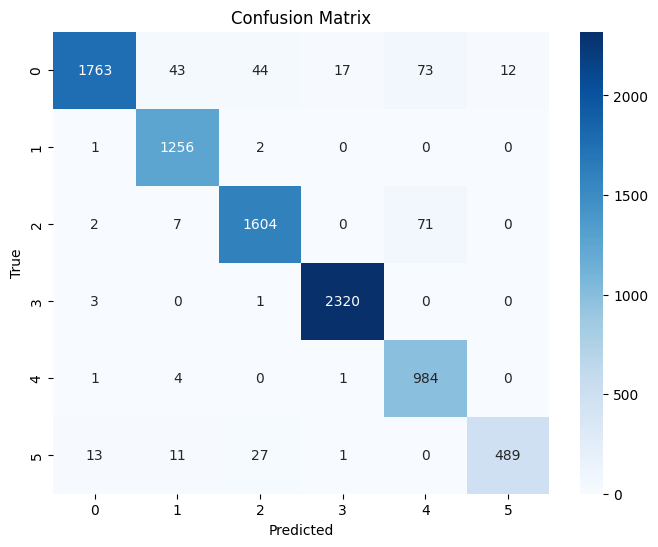

In [16]:
# Predictions
y_pred = model.predict(X_test).argmax(axis=1)
y_true = y_test

# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [17]:
# Classification report
print(classification_report(y_true, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.989     0.903     0.944      1952
           1      0.951     0.998     0.974      1259
           2      0.956     0.952     0.954      1684
           3      0.992     0.998     0.995      2324
           4      0.872     0.994     0.929       990
           5      0.976     0.904     0.939       541

    accuracy                          0.962      8750
   macro avg      0.956     0.958     0.956      8750
weighted avg      0.964     0.962     0.962      8750



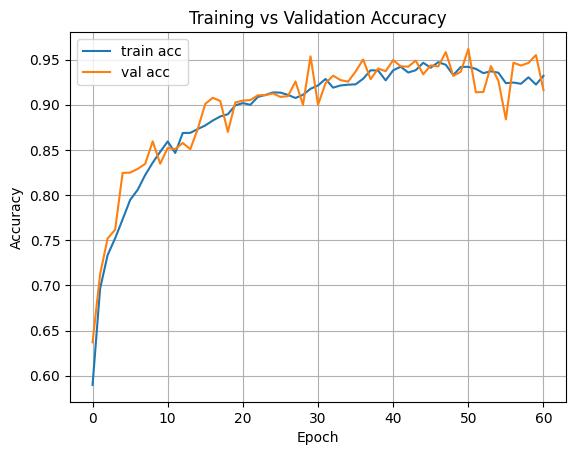

In [18]:
# Plot the training history
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [19]:
# Save the model
model.save('trained_models/lstm_batchnorm_model.h5')
model.save('trained_models/lstm_batchnorm_model.keras')